<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_2X/blob/main/GQtest_cluster_data(y_hat)_multi_delta_(_2_8)_n60_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_2X/multiplication_delta_-2.8'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-2.8_n60.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,21.914307,78.692092,-0.000227,110.606173,110.606568,-0.000395
1,0.0,1.0,23.655280,38.661471,-0.005164,72.311587,72.315167,-0.003579
2,0.0,2.0,75.305039,35.502251,0.003407,120.810697,120.805186,0.005511
3,0.0,3.0,39.723233,46.575209,0.005606,96.304048,96.297082,0.006965
4,0.0,4.0,97.970503,62.734175,-0.006736,170.697941,170.703589,-0.005647
...,...,...,...,...,...,...,...,...
59995,999.0,55.0,29.284031,26.358186,-0.012635,65.629582,65.635335,-0.005753
59996,999.0,56.0,25.454835,50.613200,-0.003961,86.064074,86.064255,-0.000181
59997,999.0,57.0,69.827055,77.978087,0.001162,157.806304,157.806286,0.000017
59998,999.0,58.0,46.477273,20.987904,-0.029648,77.435529,77.458086,-0.022557


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    21.914307  78.692092 -0.000227  110.606173  110.606568 -0.000395
      1.0    23.655280  38.661471 -0.005164   72.311587   72.315167 -0.003579
      2.0    75.305039  35.502251  0.003407  120.810697  120.805186  0.005511
      3.0    39.723233  46.575209  0.005606   96.304048   96.297082  0.006965
      4.0    97.970503  62.734175 -0.006736  170.697941  170.703589 -0.005647
...                ...        ...       ...         ...         ...       ...
999.0 55.0   29.284031  26.358186 -0.012635   65.629582   65.635335 -0.005753
      56.0   25.454835  50.613200 -0.003961   86.064074   86.064255 -0.000181
      57.0   69.827055  77.978087  0.001162  157.806304  157.806286  0.000017
      58.0   46.477273  20.987904 -0.029648   77.435529   77.458086 -0.022557
      59.0   55.699283  61.292498  0.002630  126.994411  126.990301  0.004110

[60000 rows x 6 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    21.914307  78.692092 -0.000227  110.606173  110.606568 -0.000395
      1.0    23.655280  38.661471 -0.005164   72.311587   72.315167 -0.003579
      2.0    75.305039  35.502251  0.003407  120.810697  120.805186  0.005511
      3.0    39.723233  46.575209  0.005606   96.304048   96.297082  0.006965
      4.0    97.970503  62.734175 -0.006736  170.697941  170.703589 -0.005647
...                ...        ...       ...         ...         ...       ...
999.0 55.0   29.284031  26.358186 -0.012635   65.629582   65.635335 -0.005753
      56.0   25.454835  50.613200 -0.003961   86.064074   86.064255 -0.000181
      57.0   69.827055  77.978087  0.001162  157.806304  157.806286  0.000017
      58.0   46.477273  20.987904 -0.029648   77.435529   77.458086 -0.022557
      59.0   55.699283  61.292498  0.002630  126.994411  126.990301  0.004110

[60000 rows x 6 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,21.914307,78.692092,-0.000227,110.606173,110.606568,-0.000395
1,0.0,1.0,23.655280,38.661471,-0.005164,72.311587,72.315167,-0.003579
2,0.0,2.0,75.305039,35.502251,0.003407,120.810697,120.805186,0.005511
3,0.0,3.0,39.723233,46.575209,0.005606,96.304048,96.297082,0.006965
4,0.0,4.0,97.970503,62.734175,-0.006736,170.697941,170.703589,-0.005647
...,...,...,...,...,...,...,...,...
59995,999.0,55.0,29.284031,26.358186,-0.012635,65.629582,65.635335,-0.005753
59996,999.0,56.0,25.454835,50.613200,-0.003961,86.064074,86.064255,-0.000181
59997,999.0,57.0,69.827055,77.978087,0.001162,157.806304,157.806286,0.000017
59998,999.0,58.0,46.477273,20.987904,-0.029648,77.435529,77.458086,-0.022557


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    21.914307  78.692092 -0.000227  110.606173  110.606568 -0.000395
      1.0    23.655280  38.661471 -0.005164   72.311587   72.315167 -0.003579
      2.0    75.305039  35.502251  0.003407  120.810697  120.805186  0.005511
      3.0    39.723233  46.575209  0.005606   96.304048   96.297082  0.006965
      4.0    97.970503  62.734175 -0.006736  170.697941  170.703589 -0.005647
...                ...        ...       ...         ...         ...       ...
999.0 55.0   29.284031  26.358186 -0.012635   65.629582   65.635335 -0.005753
      56.0   25.454835  50.613200 -0.003961   86.064074   86.064255 -0.000181
      57.0   69.827055  77.978087  0.001162  157.806304  157.806286  0.000017
      58.0   46.477273  20.987904 -0.029648   77.435529   77.458086 -0.022557
      59.0   55.699283  61.292498  0.002630  126.994411  126.990301  0.004110

[60000 rows x 6 columns]

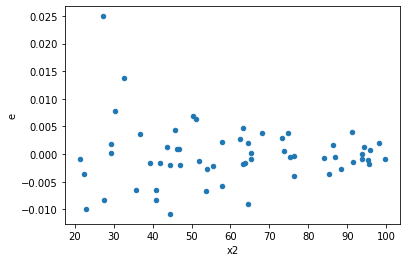

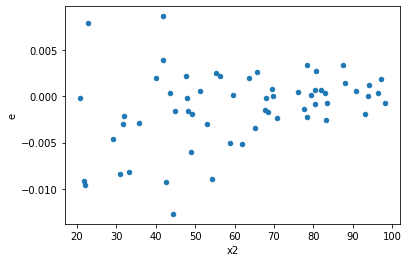

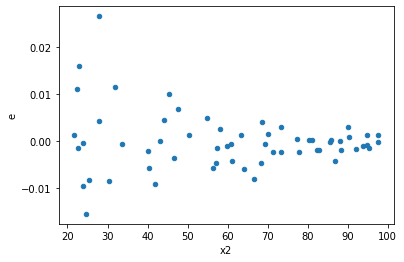

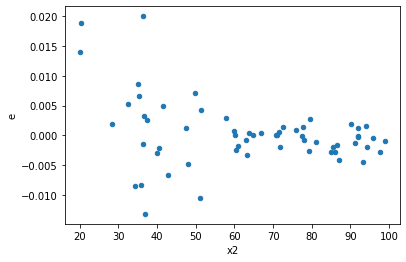

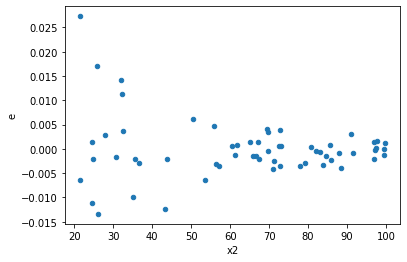

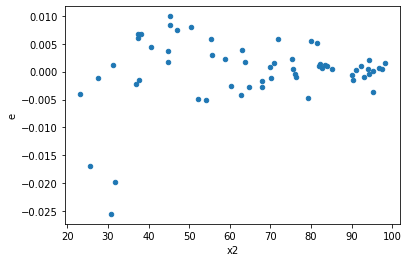

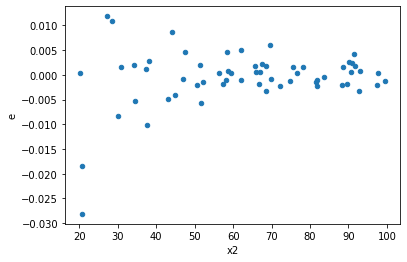

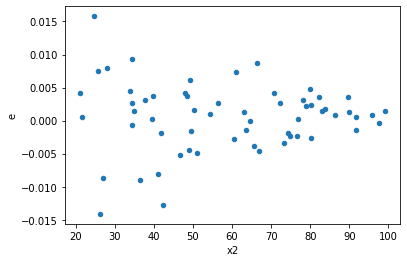

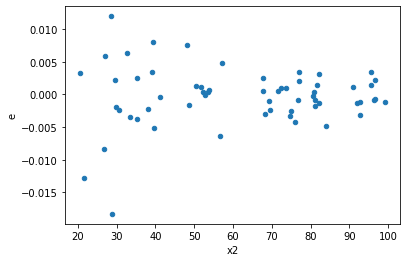

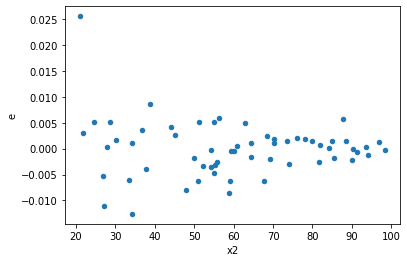

In [11]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,36.0,20.0,0.0005227432849757032,0.001020856377056801,1.4520646804880644e-05,5.104281885284005e-05,3.515189064145797,0.0040794847648313315,0.9979602576175843,0.0020397423824156657,Reject005=0 : Heteroscedasticity
2.0,29.0,27.0,0.0002347619978798563,0.0011044620268429702,8.095241306201942e-06,4.090600099418408e-05,5.053092236156703,6.173812869003648e-05,0.999969130935655,3.086906434501824e-05,Reject005=0 : Heteroscedasticity
4.0,33.0,23.0,0.0003157817944383982,0.000628320244702618,9.569145286012067e-06,2.731827150880948e-05,2.854828795288816,0.010726627122003674,0.9946366864389982,0.005363313561001837,Reject005=0 : Heteroscedasticity
6.0,17.0,39.0,0.00013413543942234144,0.000882993089069964,7.890319966020085e-06,2.2640848437691383e-05,2.869446173944139,0.006508258472595951,0.996745870763702,0.0032541292362979757,Reject005=0 : Heteroscedasticity
8.0,32.0,24.0,0.00043498917475969846,0.0008858869869701552,1.3593411711240577e-05,3.691195779042314e-05,2.715429987300402,0.013561703759698451,0.9932191481201508,0.006780851879849226,Reject005=0 : Heteroscedasticity
9.0,35.0,21.0,0.0005695236836939815,0.0008148635783061927,1.627210524839947e-05,3.880302753839013e-05,2.384634744309241,0.03851662979356085,0.9807416851032196,0.019258314896780426,Reject005=0 : Heteroscedasticity
10.0,20.0,36.0,0.00023215106073368034,0.0014515479909744241,1.1607553036684016e-05,4.0320777527067335e-05,3.4736673095215904,0.0011297398881411347,0.9994351300559294,0.0005648699440705673,Reject005=0 : Heteroscedasticity
11.0,18.0,38.0,9.062795574796743e-05,0.0007361830409832752,5.034886430442635e-06,1.9373237920612505e-05,3.8478003800592844,0.00046544546242444085,0.9997672772687878,0.00023272273121222042,Reject005=0 : Heteroscedasticity
16.0,29.0,27.0,0.00010469566034301414,0.0015224632212374714,3.610195184241867e-06,5.638752671249894e-05,15.618969012707328,2.651399100273011e-10,0.99999999986743,1.3256995501365054e-10,Reject005=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,26.0,30.0,0.0006755854091506012,0.00020947895842000916,2.598405419810005e-05,6.9826319473336385e-06,0.26872757784827156,0.001076137154352705,Reject005=0 : Heteroscedasticity
1.0,36.0,20.0,0.0005227432849757032,0.001020856377056801,1.4520646804880644e-05,5.104281885284005e-05,3.515189064145797,0.0040794847648313315,Reject005=0 : Heteroscedasticity
2.0,29.0,27.0,0.0002347619978798563,0.0011044620268429702,8.095241306201942e-06,4.090600099418408e-05,5.053092236156703,6.173812869003648e-05,Reject005=0 : Heteroscedasticity
3.0,29.0,27.0,0.0016775722373848642,0.00033673841565020154,5.784731853051256e-05,1.2471793172229687e-05,0.21559846660223717,0.00010291015662004331,Reject005=0 : Heteroscedasticity
4.0,33.0,23.0,0.0003157817944383982,0.000628320244702618,9.569145286012067e-06,2.731827150880948e-05,2.854828795288816,0.010726627122003674,Reject005=0 : Heteroscedasticity
5.0,17.0,39.0,0.0005779096762868223,0.0004400733455133635,3.399468684040131e-05,1.128393193624009e-05,0.33193222191503147,0.017114839961051512,Reject005=0 : Heteroscedasticity
6.0,17.0,39.0,0.00013413543942234144,0.000882993089069964,7.890319966020085e-06,2.2640848437691383e-05,2.869446173944139,0.006508258472595951,Reject005=0 : Heteroscedasticity
7.0,25.0,31.0,0.0010200398624465971,0.0001706991830002202,4.0801594497863885e-05,5.506425258071619e-06,0.1349561291865665,2.4059913954733395e-06,Reject005=0 : Heteroscedasticity
8.0,32.0,24.0,0.00043498917475969846,0.0008858869869701552,1.3593411711240577e-05,3.691195779042314e-05,2.715429987300402,0.013561703759698451,Reject005=0 : Heteroscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    875
Reject005=1 : Homoscedasticity      125
Name: Result_test, dtype: int64